# Histogramme

## Variable vs. gleiche Klassenbreite

Flächen unter den Balken: [0.2542 0.2695 0.0565 0.1067 0.2892 0.0239]
Summe der Flächen: 1.0


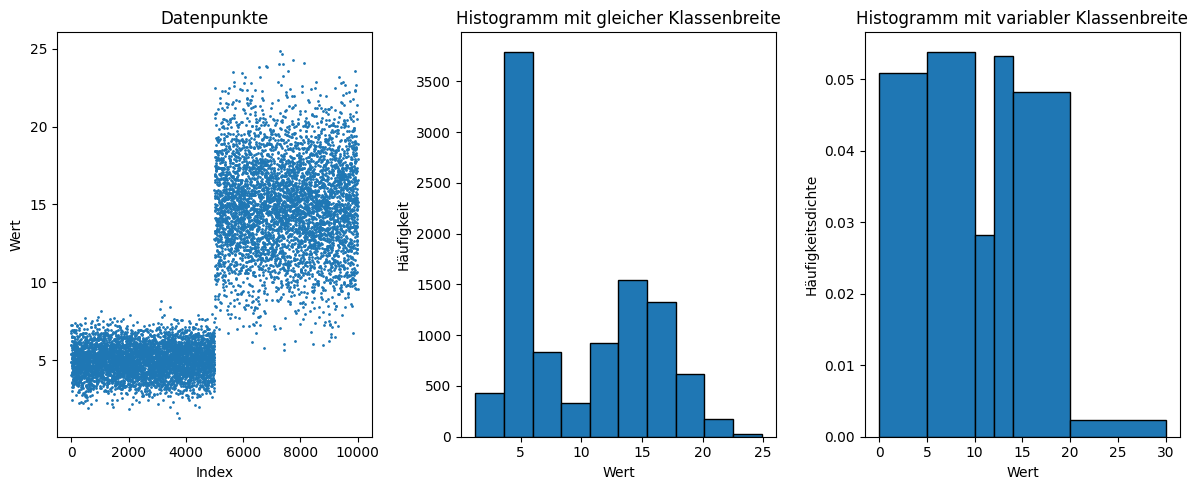

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plotRows = 1
plotCols = 3

# Daten generieren
n = 5000
np.random.seed(0)
data = np.concatenate([
    np.random.normal(5, 1, n),
    np.random.normal(15,3, n),
])

plt.figure(figsize=(12, 5))

# Daten anzeigen
plt.subplot(plotRows, plotCols, 1)
plt.plot(data, 'o', markersize=1)
plt.title("Datenpunkte")
plt.xlabel("Index")
plt.ylabel("Wert")

# Histogramm mit gleicher Klassenbreite
plt.subplot(plotRows, plotCols, 2)
plt.hist(data, bins=10, edgecolor='black')
plt.title("Histogramm mit gleicher Klassenbreite")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")

# Histogramm mit variabler Klassenbreite
bins = [0, 5, 10, 12, 14, 20, 30]

plt.subplot(plotRows, plotCols, 3)
# density=True normalisiert die Fläche unter dem Histogramm auf 1
# und macht es damit zu einer Dichtefunktion (Häufigkeitsdichte statt Häufigkeit)
counts, edges, bars = plt.hist(data, bins=bins, edgecolor='black', density=True)

flächen = counts * np.diff(edges)
print("Flächen unter den Balken:", flächen)
print("Summe der Flächen:", np.sum(flächen))

plt.title("Histogramm mit variabler Klassenbreite")
plt.xlabel("Wert")
plt.ylabel("Häufigkeitsdichte")

# Diagramme anzeigen
plt.tight_layout()
plt.show()


## 2D-Histogramme

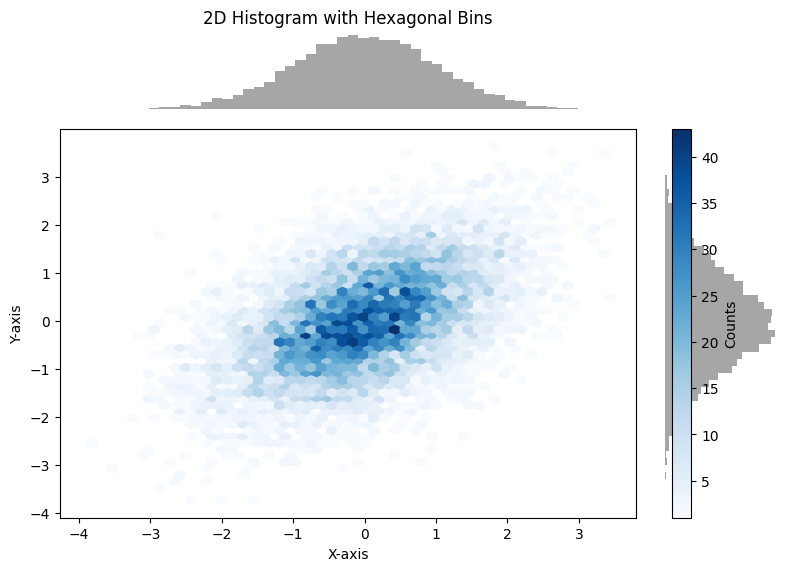

In [2]:
import numpy as np

import matplotlib.pyplot as plt

# Generate multivariate normal data
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the 2D histogram with hexagonal bins
hb = ax.hexbin(x, y, gridsize=50, cmap='Blues', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Counts')

# Add marginal distributions
ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

ax_histx.hist(x, bins=50, color='gray', alpha=0.7)
ax_histy.hist(y, bins=50, orientation='horizontal', color='gray', alpha=0.7)

ax_histx.axis('off')
ax_histy.axis('off')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Histogram with Hexagonal Bins')

plt.tight_layout()
plt.show()

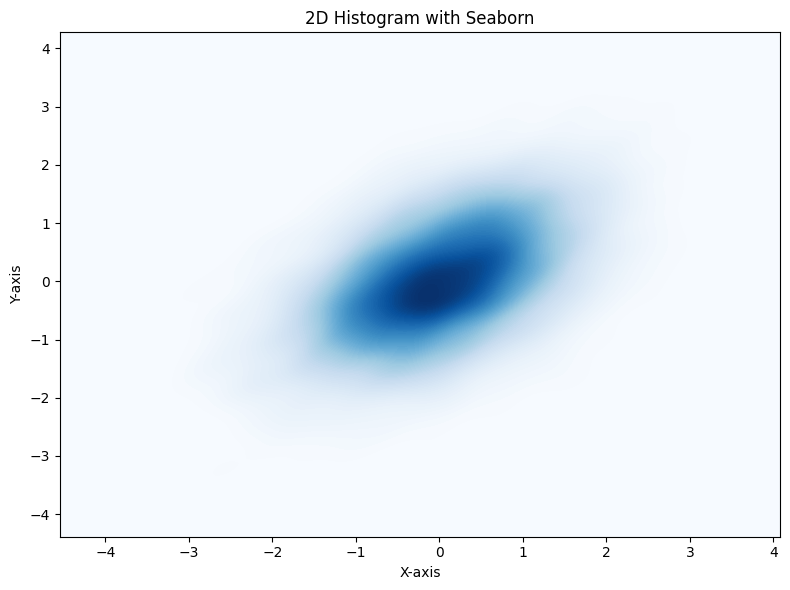

In [3]:
import seaborn as sns

# Create a figure
plt.figure(figsize=(8, 6))

# Plot the 2D histogram using seaborn
sns.kdeplot(x=x, y=y, cmap="Blues", fill=True, thresh=0, levels=100)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram with Seaborn')

plt.tight_layout()
plt.show()